
# Assignment No 4a
###### *Course Instructors: Dr. Hassan Raza, Mr. Ahmad Raza*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests. For this part you will be implemented randomized version of **Random Axis-Aligned** weak learner based Random Forest, i.e. you will be randomly selecting the feature from all set of features and than setting the threshold by randomly selecting a threshold.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## TODO: 

**Complete the code in files `randomForest.py`, `tree.py` and `weakLearner.py` by writing the missing code.**

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [48]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\pc\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\pylab.py:166: UserWarning: pylab import has clobbered these variables: ['cov']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [49]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [50]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

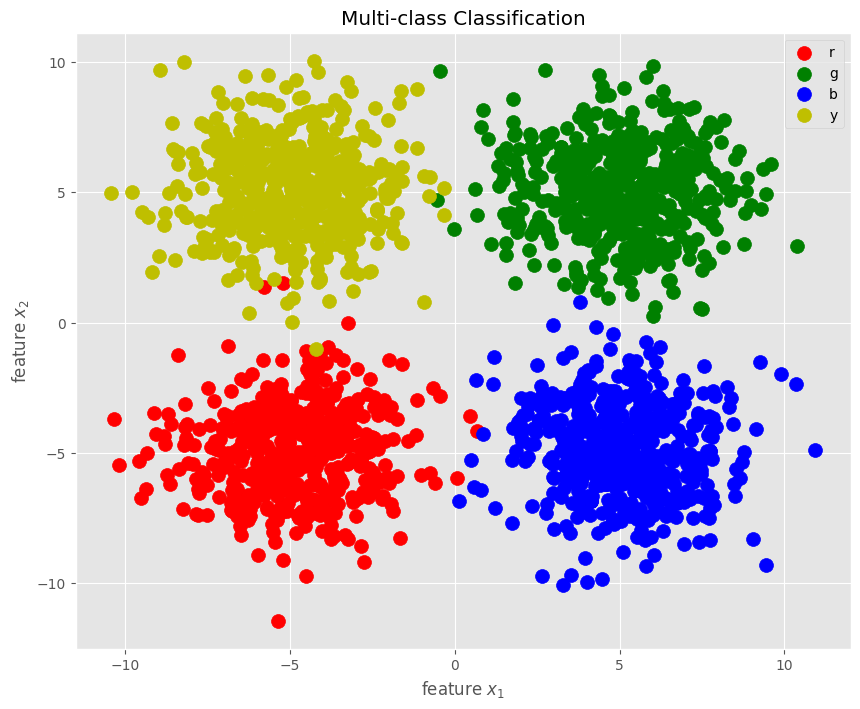

In [51]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
xint=int(nexamples/4)
x1 = np.random.multivariate_normal(mean1,cov,xint)
x2 = np.random.multivariate_normal(mean2,cov,xint)
x3 = np.random.multivariate_normal(mean3,cov,xint)
x4 = np.random.multivariate_normal(mean4,cov,xint)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((xint,1)),2*np.ones((xint,1)),3*np.ones((xint,1)),4*np.ones((xint,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x2int=int(ntexamples/4)
x1 = np.random.multivariate_normal(mean1,cov,x2int)
x2 = np.random.multivariate_normal(mean2,cov,x2int)
x3 = np.random.multivariate_normal(mean3,cov,x2int)
x4 = np.random.multivariate_normal(mean4,cov,x2int)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((x2int,1)),2*np.ones((x2int,1)),3*np.ones((x2int,1)),4*np.ones((x2int,1))))


In [52]:
import randomForest as rf

In [53]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random')

In [54]:
print (X.shape, Y.shape)

(2000, 2) (2000, 1)


In [55]:
np.spacing(1)

2.220446049250313e-16

In [56]:
#%pdb ON
rfc.train(X,Y)

In [57]:
np.spacing(1)

2.220446049250313e-16

In [58]:
len(rfc.trees)

10

In [59]:
# Training Confusion Matrix...
%pdb off
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned OFF
(2000, 1) 2000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        498    0    1    1   500
2.0          0  496    0    4   500
3.0          7    5  488    0   500
4.0          1    0    0  499   500
All        506  501  489  504  2000

In [11]:
# Training Confusion Matrix...
%pdb
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned ON
(2000, 1) 2000


Predicted  1.0   2.0  4.0   All
Actual                         
1.0        491     9    0   500
2.0          0   500    0   500
3.0         30   470    0   500
4.0         35   464    1   500
All        556  1443    1  2000

In [60]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp).flatten()) / float(Y.shape[0])
#print (acc)
assert_greater_equal(acc, 0.40)

In [61]:
Y.shape

(2000, 1)

d:\D-Documents\University\Sem 5\ML\Assignments\Assignment4\Attempt3\Assignment4\A4\tools.py:699: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


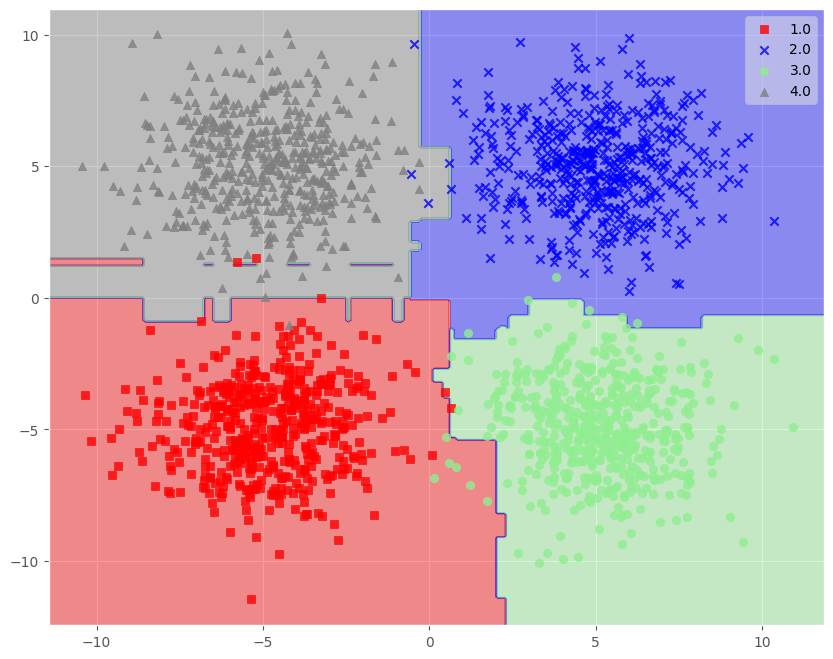

In [62]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-raa-10trees.svg',format='svg')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

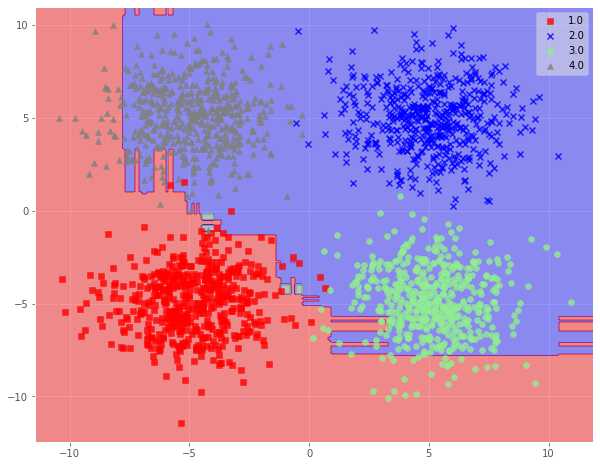

In [ ]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-raa-10trees.svg',format='svg')

In [63]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Ypt.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Yt)

(1000,) 1000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        249    0    0    1   250
2.0          0  249    0    1   250
3.0          6    2  242    0   250
4.0          1    1    0  248   250
All        256  252  242  250  1000

In [19]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Ypt.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Yt)

(1000,) 1000


Predicted  1.0  2.0   All
Actual                   
1.0        247    3   250
2.0          0  250   250
3.0         26  224   250
4.0         20  230   250
All        293  707  1000

In [64]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 
print (acc)
assert_greater_equal(acc, 0.40)

0.988


In [18]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 
print (acc)
assert_greater_equal(acc, 0.40)

0.988


d:\D-Documents\University\Sem 5\ML\Assignments\Assignment4\Attempt3\Assignment4\A4\tools.py:699: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


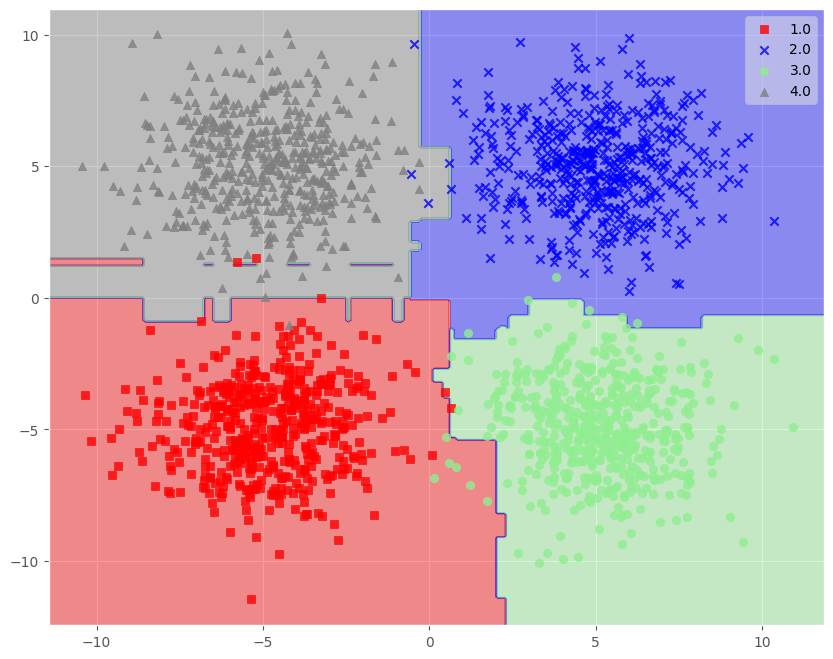

In [65]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

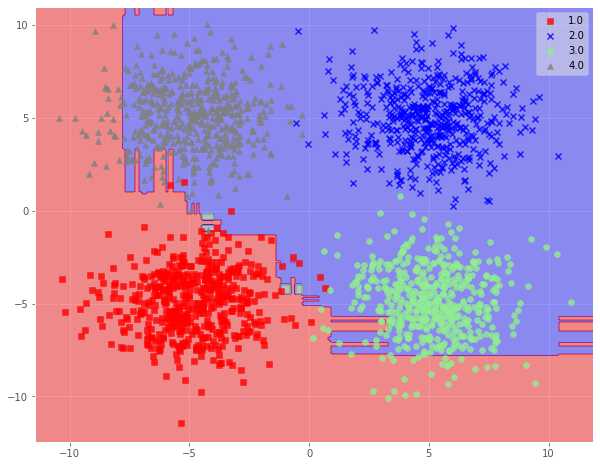

In [23]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

(10000, 2)
[1.0, 2.0, 3.0, 4.0]


AttributeError: 'Axes' object has no attribute 'hold'

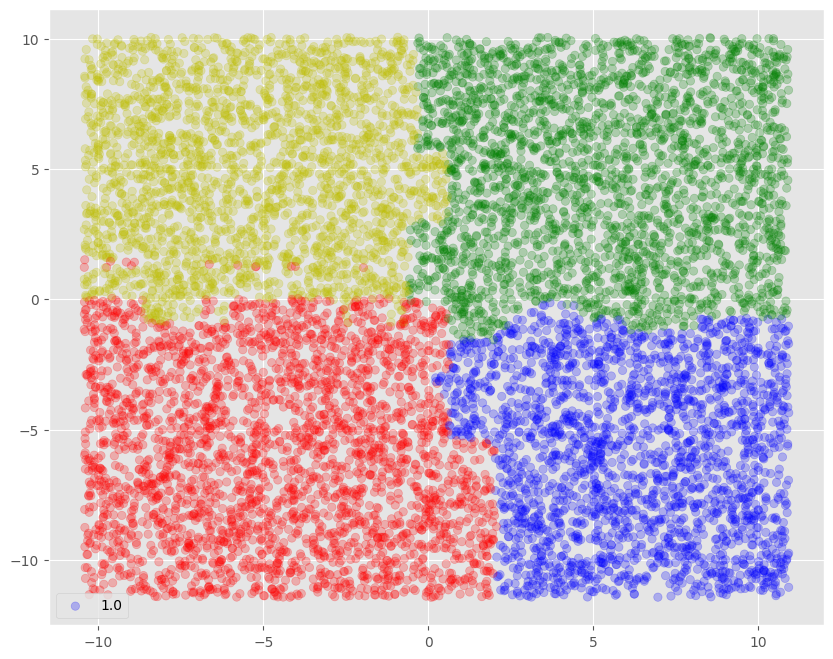

In [66]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

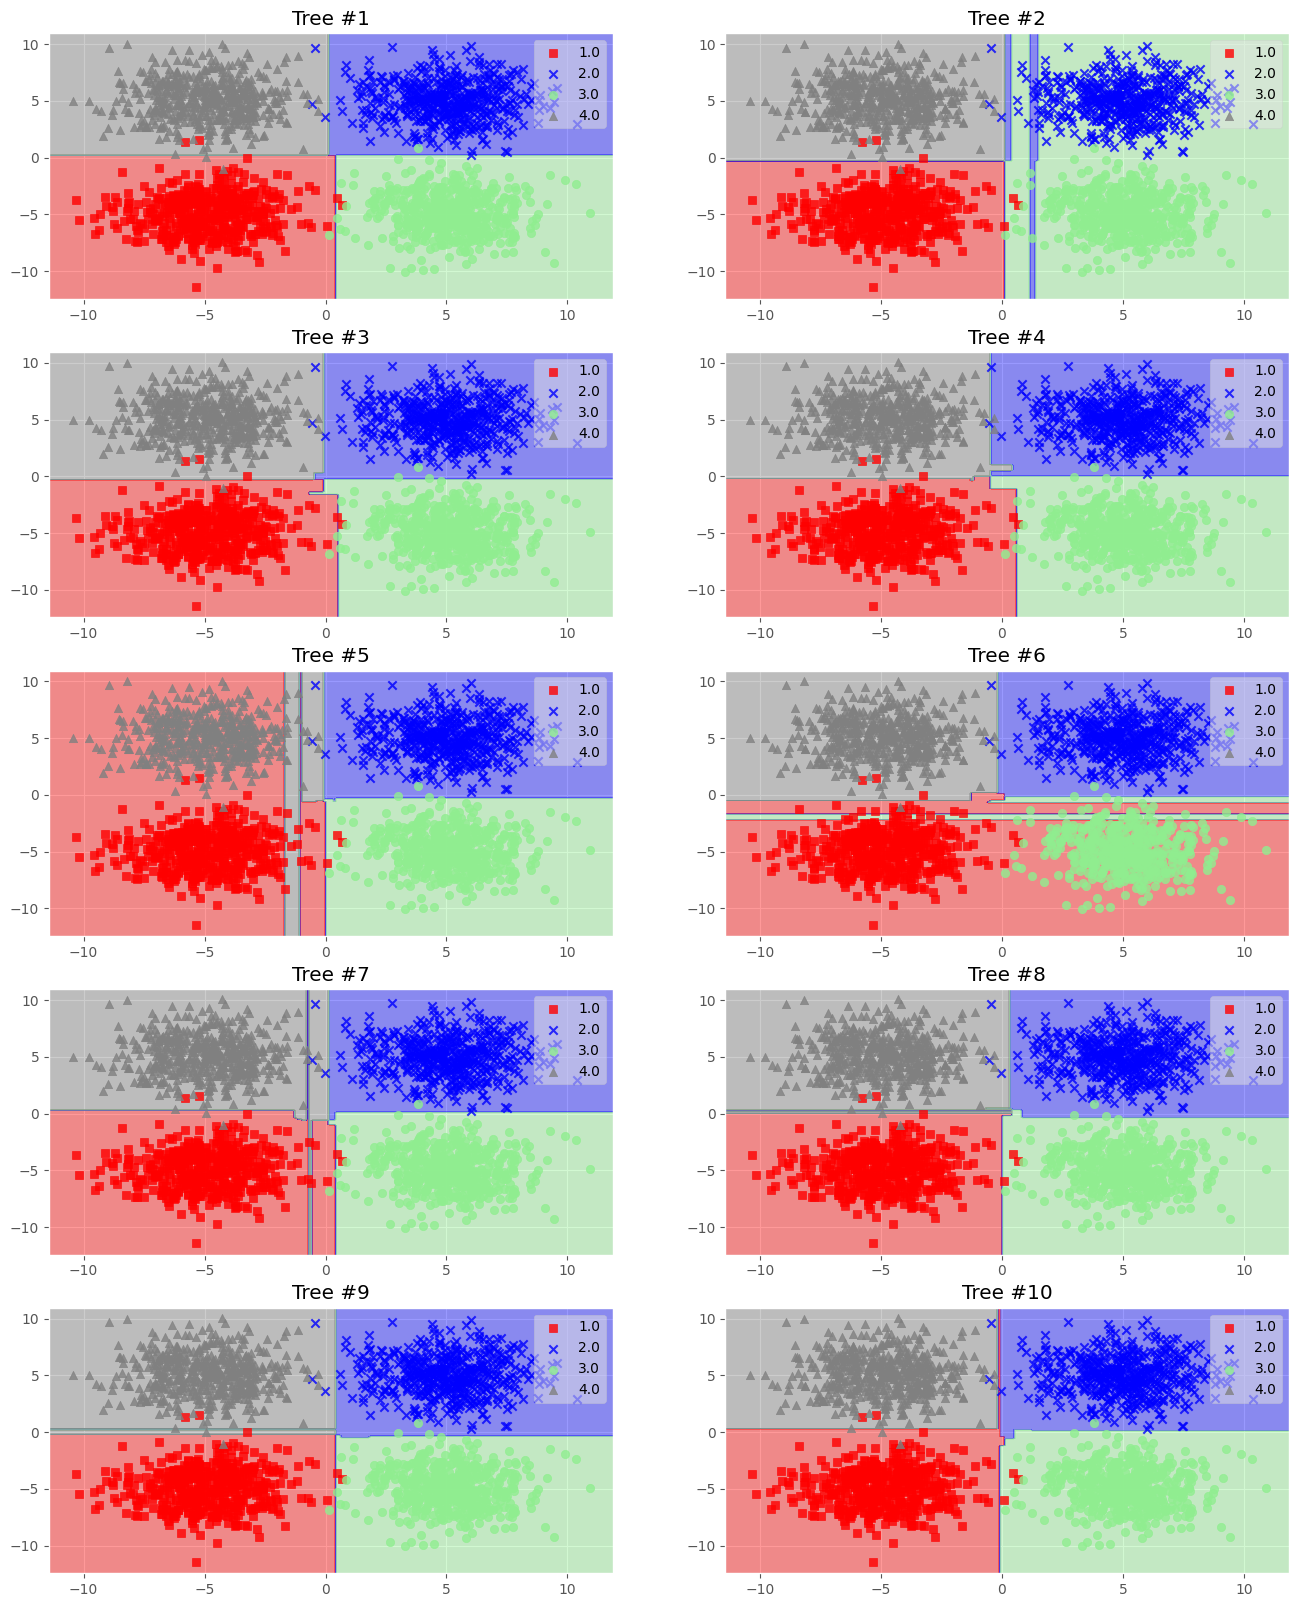

In [67]:
ntrees=rfc.ntrees
nrows=ntrees//2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

#### What Can You conclude

In [ ]:
# Different trees from the random forest have learned different separating lines from the training data. 
# This is the reason why the random forest is able to generalize well on the testing data. The random forest is able to generalize well on the testing data 
# because it averages the predictions of the individual trees. The individual trees are able to learn different separating lines from the training data. 


## Lets Run on Nonlinear Data, The Spherical Examples...

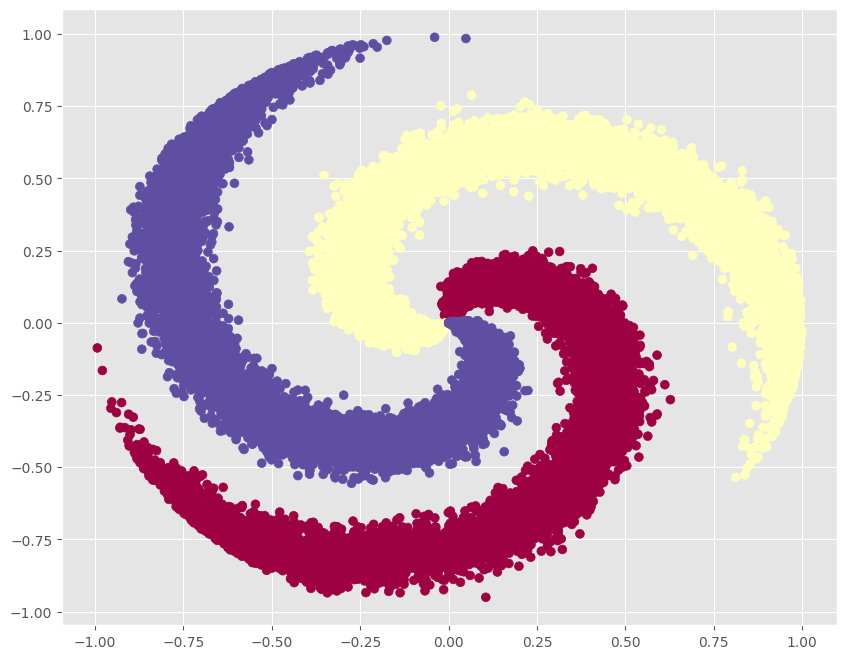

In [68]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

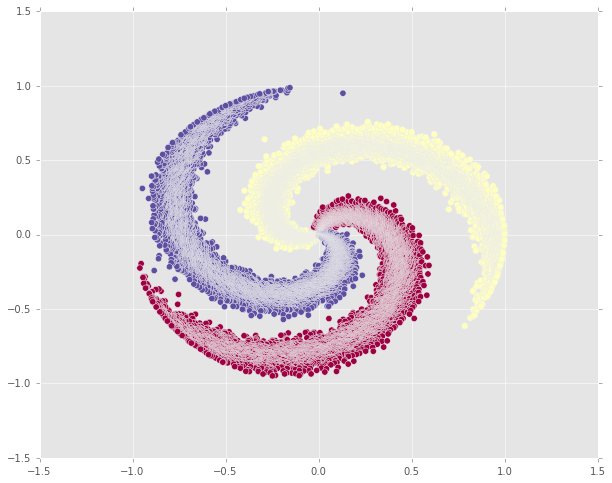

In [18]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

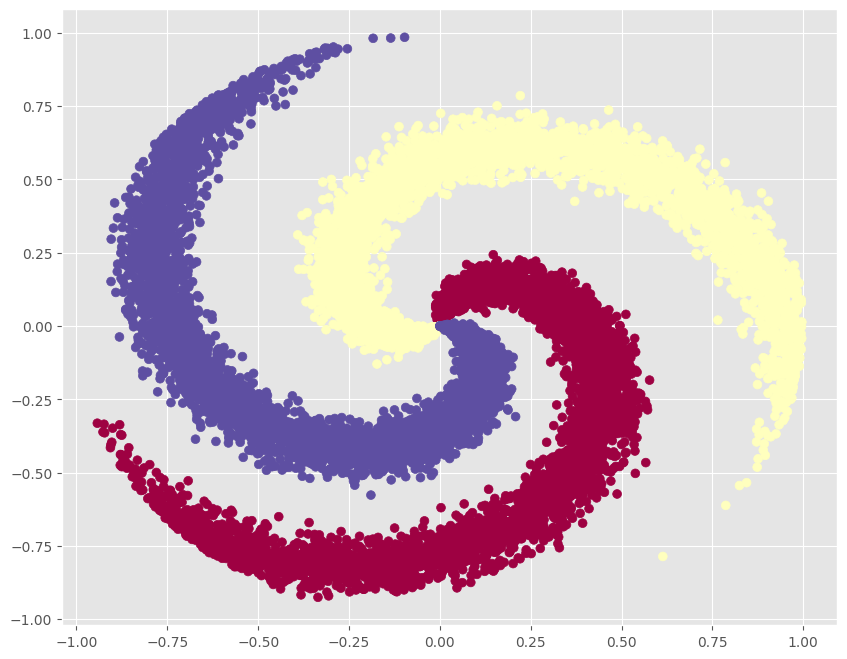

In [69]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

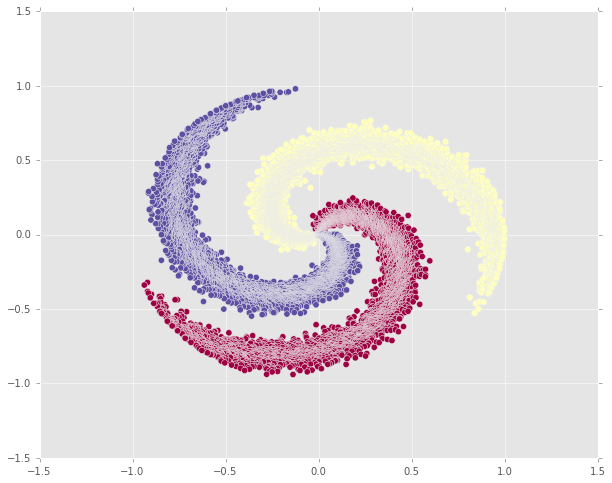

In [19]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [70]:
import randomForest as rf

rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random',usebagging=False)
rfc.train(X,Y)

In [71]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print(Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted   0.0    1.0   2.0    All
Actual                             
0          9766    193    41  10000
1            21   9978     1  10000
2            74     42  9884  10000
All        9861  10213  9926  30000

In [72]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print(Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted   0.0   1.0   2.0    All
Actual                            
0          4882    93    25   5000
1            12  4983     5   5000
2            36    19  4945   5000
All        4930  5095  4975  15000

In [73]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

(10000, 2)
[0.0, 1.0, 2.0]


AttributeError: 'Axes' object has no attribute 'hold'

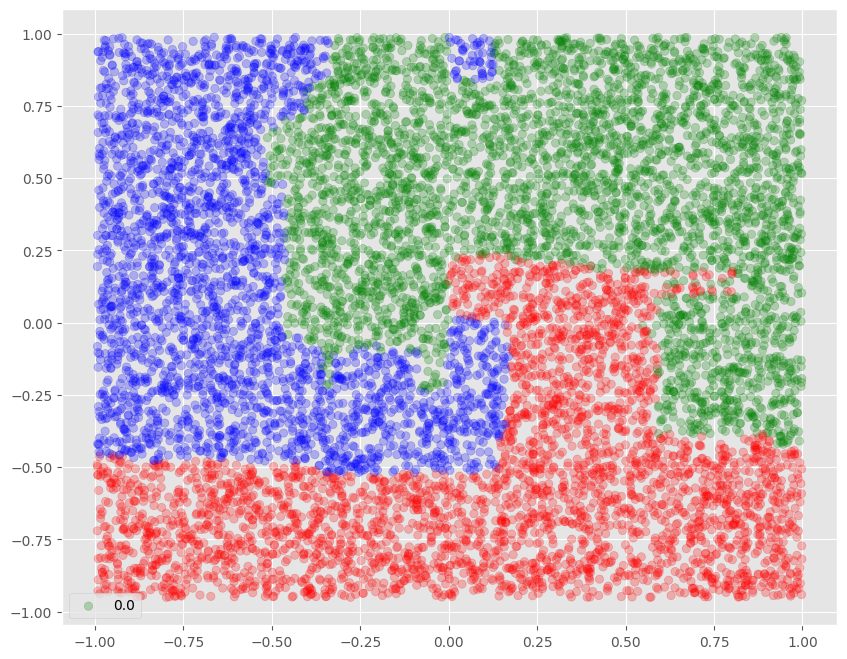

In [74]:
t.plot_points_range(rfc,X,Y)

d:\D-Documents\University\Sem 5\ML\Assignments\Assignment4\Attempt3\Assignment4\A4\tools.py:699: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


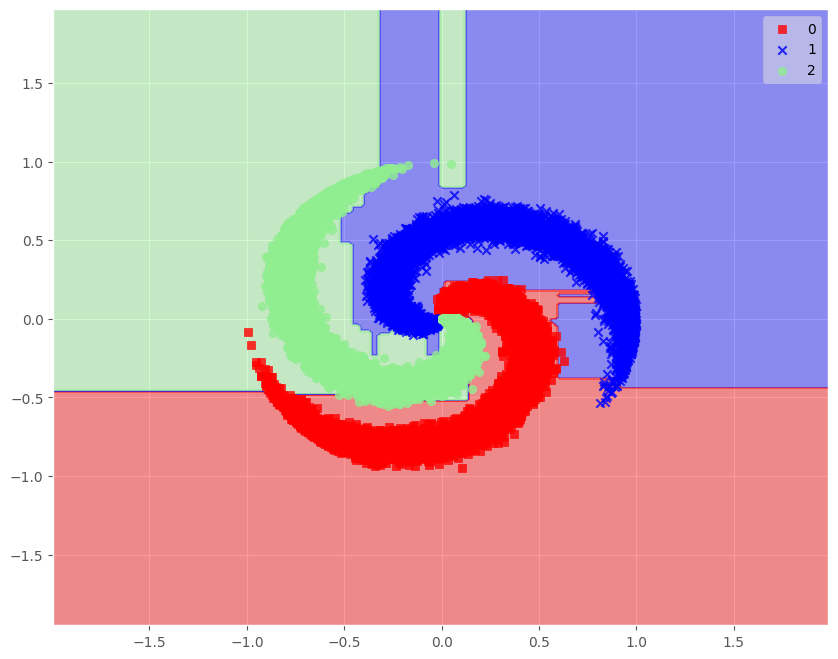

In [75]:
t.plot_decision_regions(X,Y,rfc)

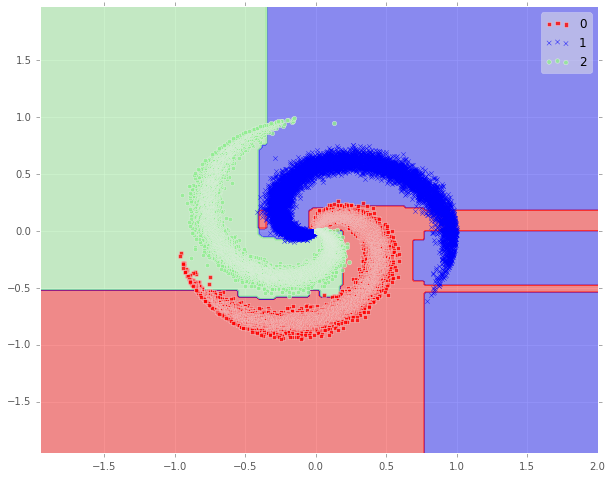

In [25]:
t.plot_decision_regions(X,Y,rfc)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

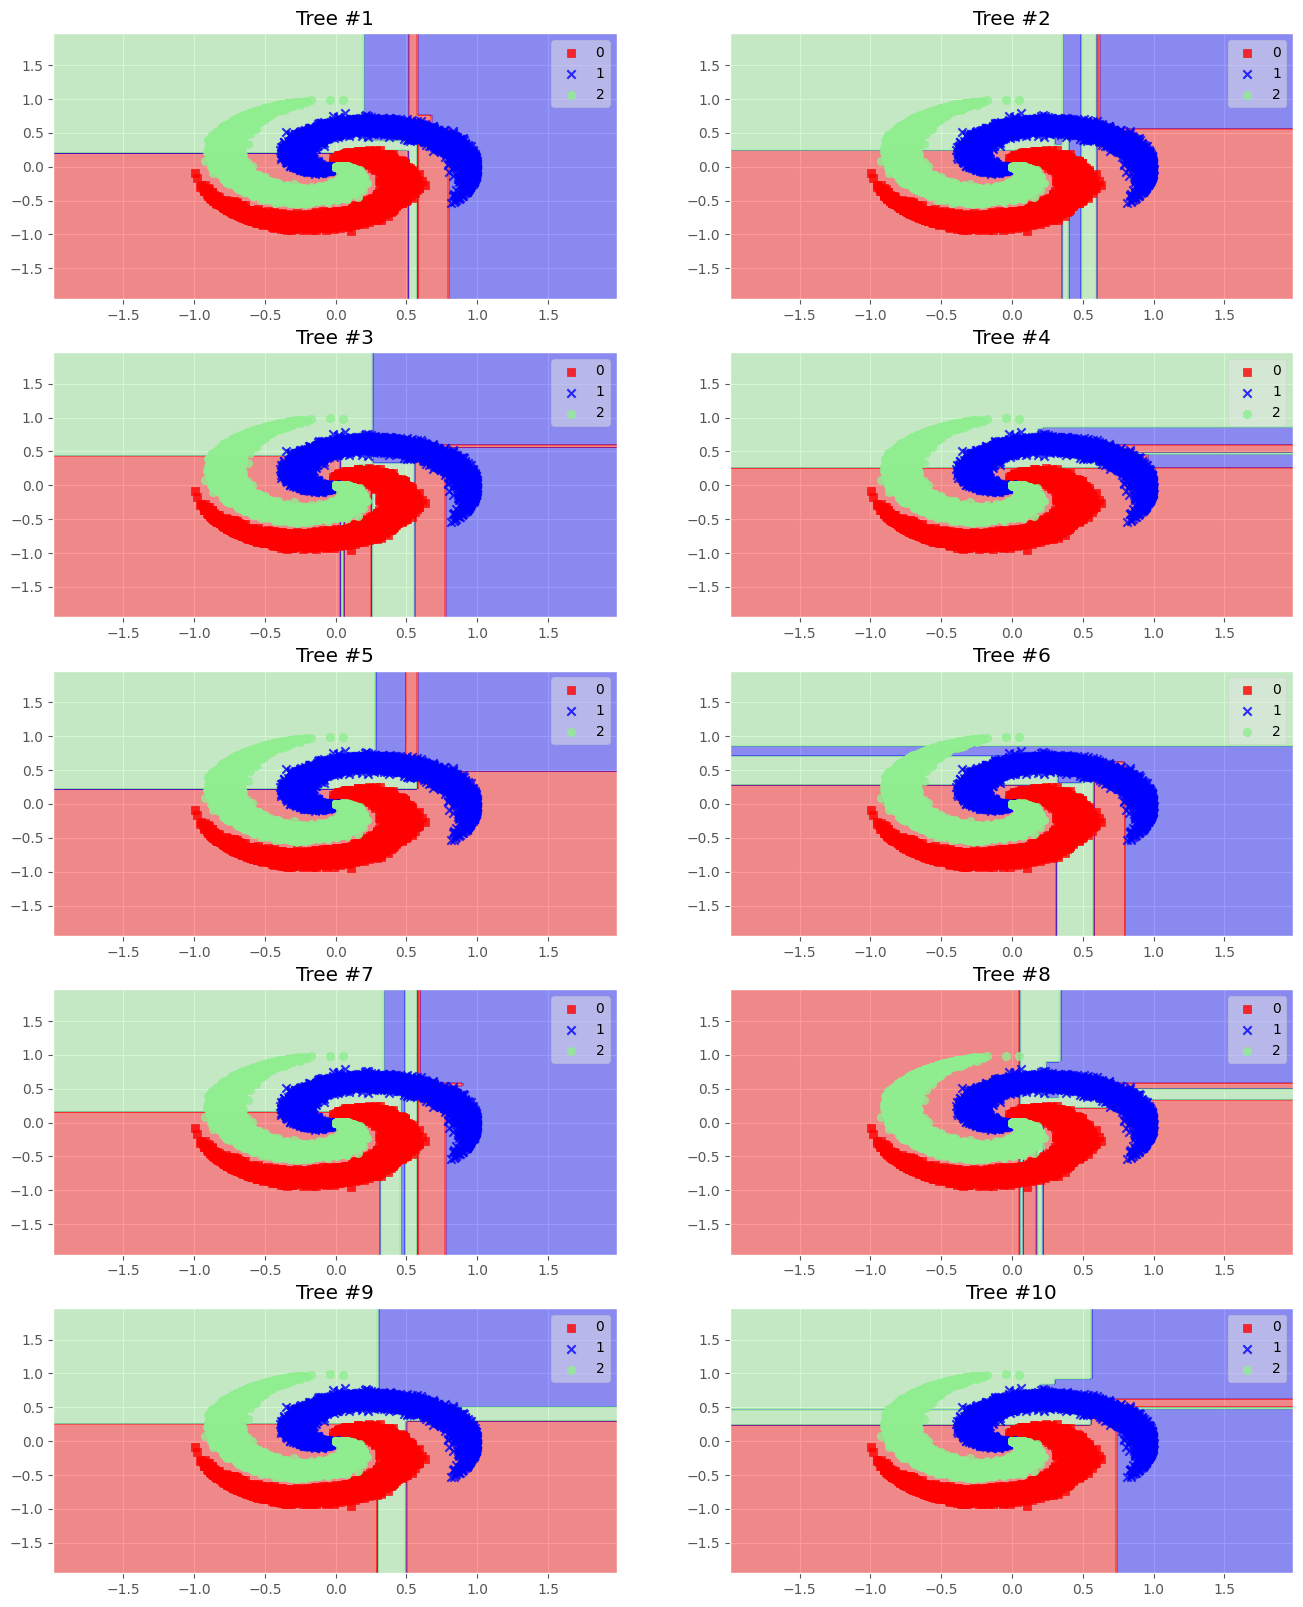

In [400]:
ntrees=rfc.ntrees
nrows=ntrees//2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

<function matplotlib.pyplot.tight_layout>

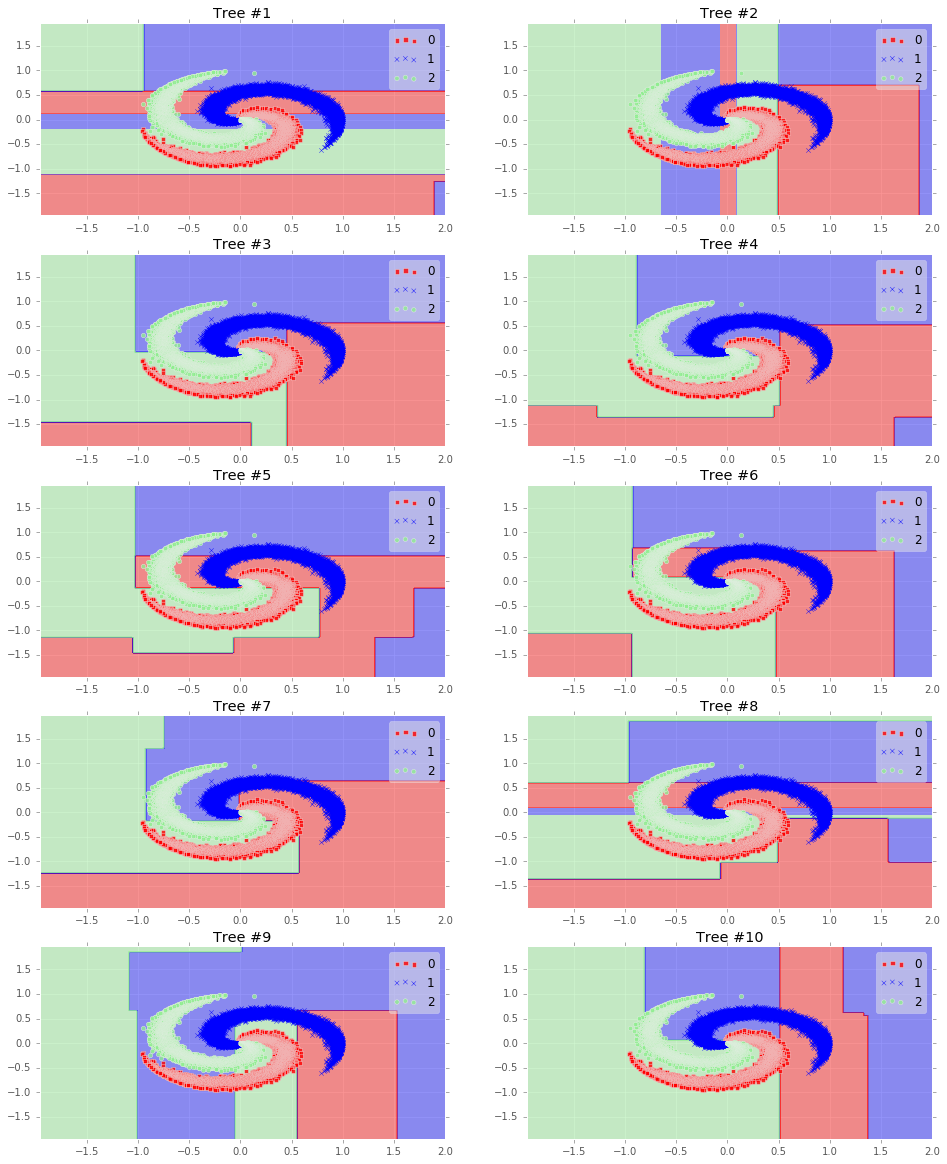

In [26]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

## TODO: Find Optimal Number of Trees for this data set, using cross validation...

In [404]:

ntrees = range(1,20)
best_trees = 0
best_acc = 0.0

for n in ntrees:
    rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random',ntrees=n,usebagging=False)
    rfc.train(X,Y)
    Ypt=rfc.predict(Xtest)
    acc = np.sum(Ytest.flatten() ==  np.array(Ypt.astype(np.uint8))) / float(Ytest.shape[0]) 
    print ("No. of Trees :",n, "Accuracy :", acc, "%")

    if acc > best_acc:
        best_acc = acc
        best_trees = n


print(f"\nBest Accuracy: {best_acc} with {best_trees} number of trees!")



No. of Trees : 1 Accuracy : 0.8387333333333333 %
No. of Trees : 2 Accuracy : 0.9265333333333333 %
No. of Trees : 3 Accuracy : 0.958 %
No. of Trees : 4 Accuracy : 0.9394666666666667 %
No. of Trees : 5 Accuracy : 0.9488 %
No. of Trees : 6 Accuracy : 0.9387333333333333 %
No. of Trees : 7 Accuracy : 0.9589333333333333 %
No. of Trees : 8 Accuracy : 0.9609333333333333 %
No. of Trees : 9 Accuracy : 0.9385333333333333 %
No. of Trees : 10 Accuracy : 0.9684 %
No. of Trees : 11 Accuracy : 0.9736 %
No. of Trees : 12 Accuracy : 0.9730666666666666 %
No. of Trees : 13 Accuracy : 0.9865333333333334 %
No. of Trees : 14 Accuracy : 0.9883333333333333 %
No. of Trees : 15 Accuracy : 0.9654666666666667 %
No. of Trees : 16 Accuracy : 0.9828 %
No. of Trees : 17 Accuracy : 0.9839333333333333 %
No. of Trees : 18 Accuracy : 0.9715333333333334 %
No. of Trees : 19 Accuracy : 0.9842666666666666 %

Best Accuracy: 0.9883333333333333 with 14 number of trees!
